<a href="https://colab.research.google.com/github/OJB-Quantum/IPYNB-to-PDF/blob/main/IPYNB_to_PDF_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your Jupyter Notebook file (IPYNB), label the desired output file below, and run all the cells below to begin converting your notebook(s) into PDF format.

In [ ]:
!wget https://github.com/jgm/pandoc/releases/download/3.1.8/pandoc-3.1.8-linux-amd64.tar.gz -O pandoc.tar.gz
!tar -xvzf pandoc.tar.gz --strip-components 1 -C /usr/local/
!rm pandoc.tar.gz

In [ ]:
!pandoc --version

In [ ]:
!apt-get update && apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!pip install nbconvert
!apt-get install -y wkhtmltopdf

In [ ]:
# Example notebook_path for reference: /content/JJ_Quantum_Tunneling_Prediction.ipynb
# The IPYNB file can be uploaded under the file icon, then the path can be copied from the 3 dot icon (see image below).
# Google Colab will automatically delete any uploaded files after a session is completed, so just be aware of that.

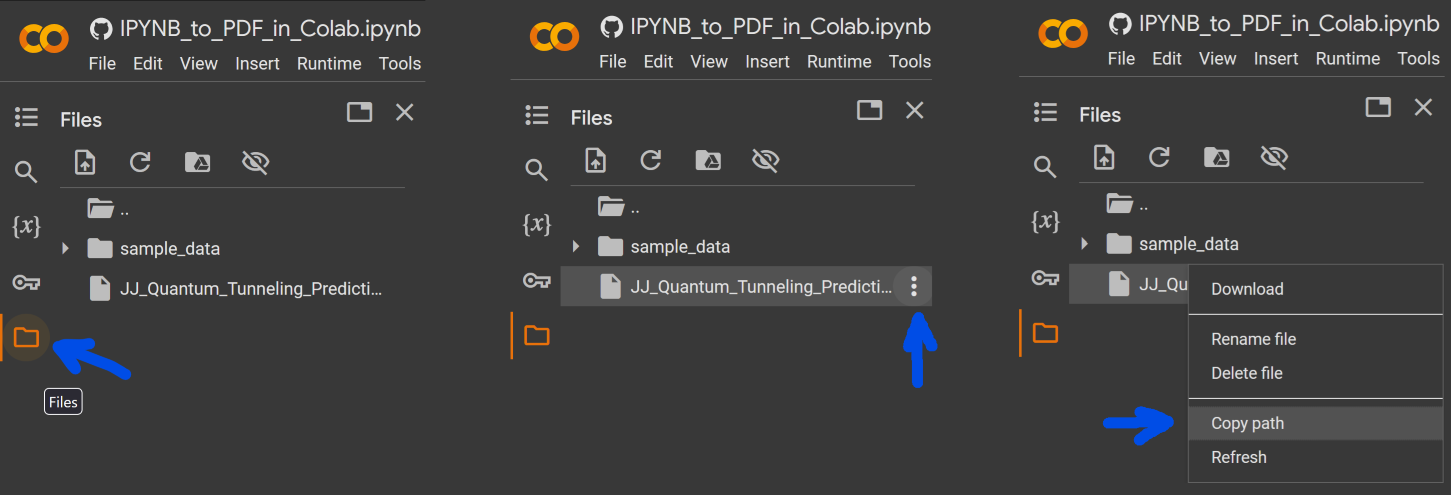

In [ ]:
import os
import nbformat
from nbconvert import HTMLExporter

# Define paths
notebook_path = "/content/JJ_Quantum_Tunneling_Prediction.ipynb" # Paste the copied file path with your own file path, but make sure it is uploaded to Google Colab first.
html_path = "/content/JJ_Quantum_Tunneling_Prediction.html" # Provide the desired name of the converted file and add the .html extension to automatically open the converted PDF in a new tab in the browser to be downloaded.
pdf_path = "/content/JJ_Quantum_Tunneling_Prediction.pdf" # Provide the desired name of the converted file and add the .pdf extension.

# Check if notebook exists
if not os.path.exists(notebook_path):
    raise FileNotFoundError(f"Notebook file not found at path: {notebook_path}")

# Read the notebook content
with open(notebook_path, 'r', encoding='utf-8') as nb_file:
    notebook_content = nb_file.read()

# Convert notebook to HTML
notebook_node = nbformat.reads(notebook_content, as_version=4)
html_exporter = HTMLExporter()
html_data, _ = html_exporter.from_notebook_node(notebook_node)

# Save the HTML file
with open(html_path, 'w', encoding='utf-8') as html_file:
    html_file.write(html_data)

# Convert HTML to PDF using wkhtmltopdf
os.system(f"wkhtmltopdf {html_path} {pdf_path}")

print(f"PDF successfully saved to: {pdf_path}")

# Provide a download link for the PDF
from google.colab import files
files.download(pdf_path)